# PCA-report for STEW

## Correlation analysis
We do this and this and this and then:
* this
* and this
* and *this*
* and **this**

> this is also interesting.

This is `code` and this is:

```
very
long(code)
```

In [1]:
%reload_ext rpy2.ipython

Here we import the data from a csv into a data frame. In R, the data frame is :

> a tightly coupled collections of variables which share many of the properties of matrices and of lists, used as the fundamental data structure by most of R's modeling software.

In [115]:
%%R
library(data.table)
d=data.frame(fread("BE_data_for_PCA.csv"))
print (dim (d))
names(d)

[1] 73 60
 [1] "V1"       "Dist"     "Line"     "Location" "Cal"      "Dol"     
 [7] "CalDol"   "ORP3"     "pH1"      "Al_ES"    "Fe_ES"    "Mg_ES"   
[13] "Mn_ES"    "Na_ES"    "P_ES"     "S_ES"     "K_ES"     "Ti_ES"   
[19] "V_ES"     "Ag_MS"    "Ba_MS"    "Be_MS"    "Ca_ES"    "Cd_MS"   
[25] "Ce_MS"    "Co_MS"    "Cr_MS"    "Cs_MS"    "Cu_MS"    "Dy_MS"   
[31] "Er_MS"    "Eu_MS"    "Ga_MS"    "Gd_MS"    "Hf_MS"    "Ho_MS"   
[37] "La_MS"    "Li_MS"    "Lu_MS"    "Mo_MS"    "Nb_MS"    "Nd_MS"   
[43] "Pb_MS"    "Pr_MS"    "Rb_MS"    "Sb_MS"    "Sm_MS"    "Sn_MS"   
[49] "Tb_MS"    "Th_MS"    "Tl_MS"    "Tm_MS"    "U._MS"    "W._MS"   
[55] "Y._MS"    "Yb_MS"    "Zn_MS"    "Zr_MS"    "LREE"     "HREE"    


The complete dataset has 60 variables (elements), and 73 rows (sampling stations). We extract a subset of data limited to the elements to be considered in the PCA.

* Aim at having at least 5 time less variables than samples (=approx 14)
* Remove all elements with high correlation values (>90%)
* Select elements for which variability can be explained, ie. which are representative of reactions likely occuring at the ring edge

*PASTE REACTION CHAIN HERE**

$H_2O+Ca^{2+}=3H_3O^+$

In [117]:
%%R

va=c("V1", "Dist", "Location", "Zr_MS", "Mn_ES", "Fe_ES", "pH1", "Ca_ES","Mg_ES", "Cal", "Dol", "ORP3", "S_ES", "Cd_MS")
cnums=cbind(1:ncol(d), colnames(d))
subset=d[,as.numeric(cnums[cnums[,2] %in% va,1])]
print(length(va))
print (ncol(subset))
colnames(subset)

[1] 14
[1] 14
 [1] "V1"       "Dist"     "Location" "Cal"      "Dol"      "ORP3"    
 [7] "pH1"      "Fe_ES"    "Mg_ES"    "Mn_ES"    "S_ES"     "Ca_ES"   
[13] "Cd_MS"    "Zr_MS"   


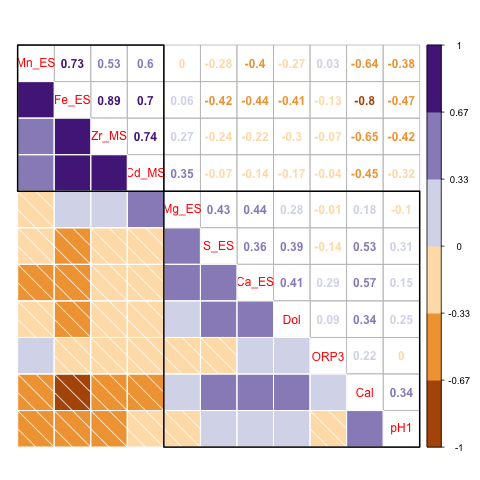

In [95]:
%%R
library("corrplot")
library("RColorBrewer")

#cor((subset[,4:14]))

corrplot.mixed(cor(subset[,4:14]), lower="shade", upper="number",order="AOE", col=brewer.pal(n=6, name="PuOr"))
corrRect.hclust(corr=cor(subset[,4:14]), k=2)

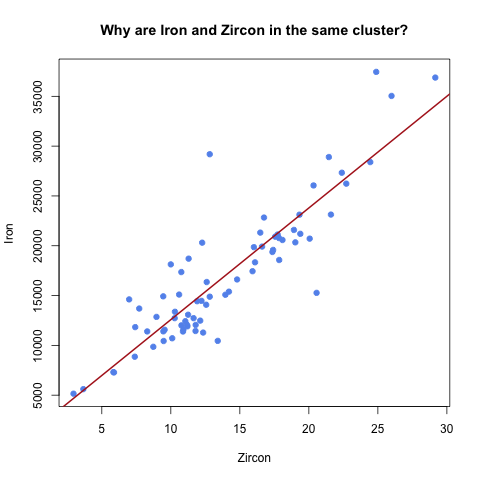

In [118]:
%%R
plot(x=subset$Zr_MS,y=subset$Fe_ES, pch=19, col="cornflowerblue",main="Why are Iron and Zircon in the same cluster?",xlab="Zircon",ylab="Iron")
abline(lm(subset$Fe_ES~subset$Zr_MS),lwd=2,col="firebrick")

# Standardizing and normalizing

In [160]:
%%R
# definir fonction standardisation et normalisation
stdnorm=function(x) {return((x-mean(x))/sd(x))}
invnorm=function(x) {return(qnorm((rank(x, ties.method="random")-3/8)/(length(x)-0.75+1)))}

# normaliser les colonnes voulues de subset
allnorm=data.frame(apply(as.matrix(subset[,4:14]), 2, invnorm))
ncol(allnorm)

[1] 11


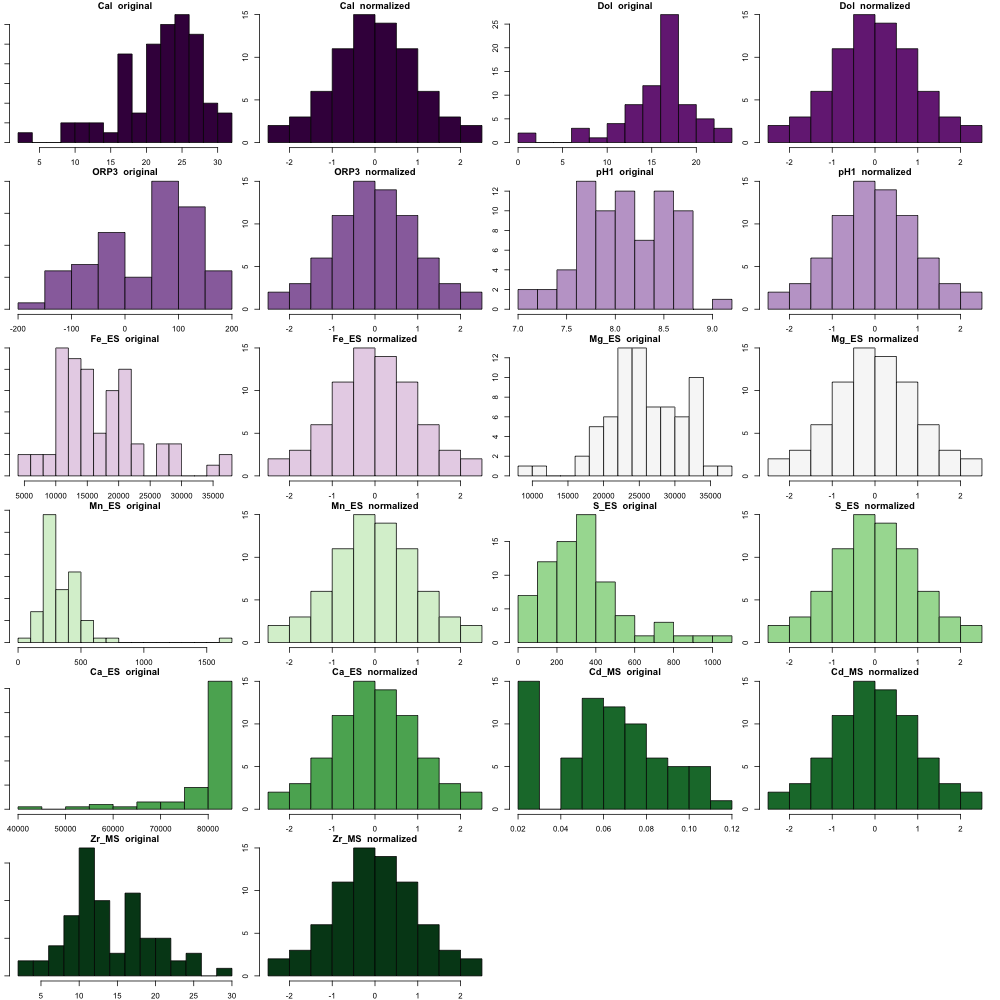

In [163]:
%%R -w 1000 -h 1000

#place side by side
par(mfrow=c(6,4),mar=c(2,1,1,1))

#color=c("yellow","blue","orange","red","green","pink","purple","salmon","beige","turquoise")
color=brewer.pal(n=11, name="PRGn")
for (n in 1:11)
    
{
hist(subset[,n+3],breaks=12,main=paste(colnames(subset)[n+3]," original"),col=color[n])
hist(allnorm[,n],breaks=12,main=paste(colnames(subset)[n+3]," normalized"),col=color[n])
}



## PCA 

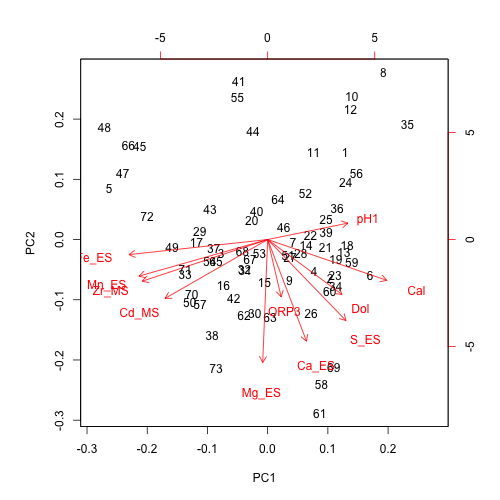

In [166]:
%%R -h 500 -w 500
pca=prcomp(allnorm)

#Biplot
biplot(pca,pch=19)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1177 1.4814 1.1567 0.86517 0.79655 0.60704 0.52523
Proportion of Variance 0.4192 0.2051 0.1251 0.06997 0.05931 0.03445 0.02579
Cumulative Proportion  0.4192 0.6243 0.7494 0.81937 0.87868 0.91313 0.93892
                           PC8     PC9    PC10    PC11
Standard deviation     0.50372 0.42432 0.41954 0.20902
Proportion of Variance 0.02372 0.01683 0.01645 0.00408
Cumulative Proportion  0.96263 0.97946 0.99592 1.00000


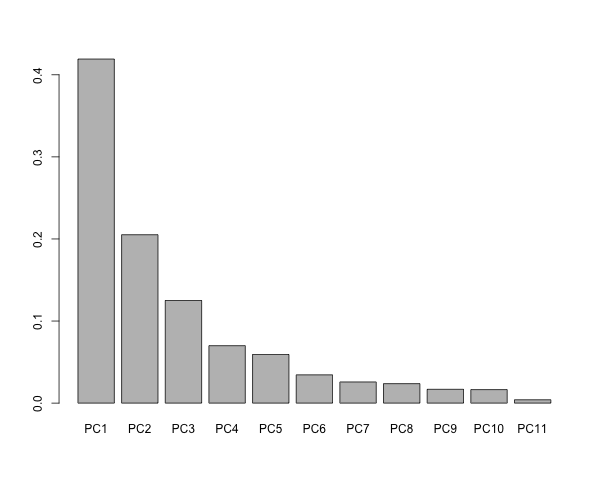

In [172]:
%%R -w 600
#variance explained
barplot(summary(pca)$importance[2,])
summary(pca)

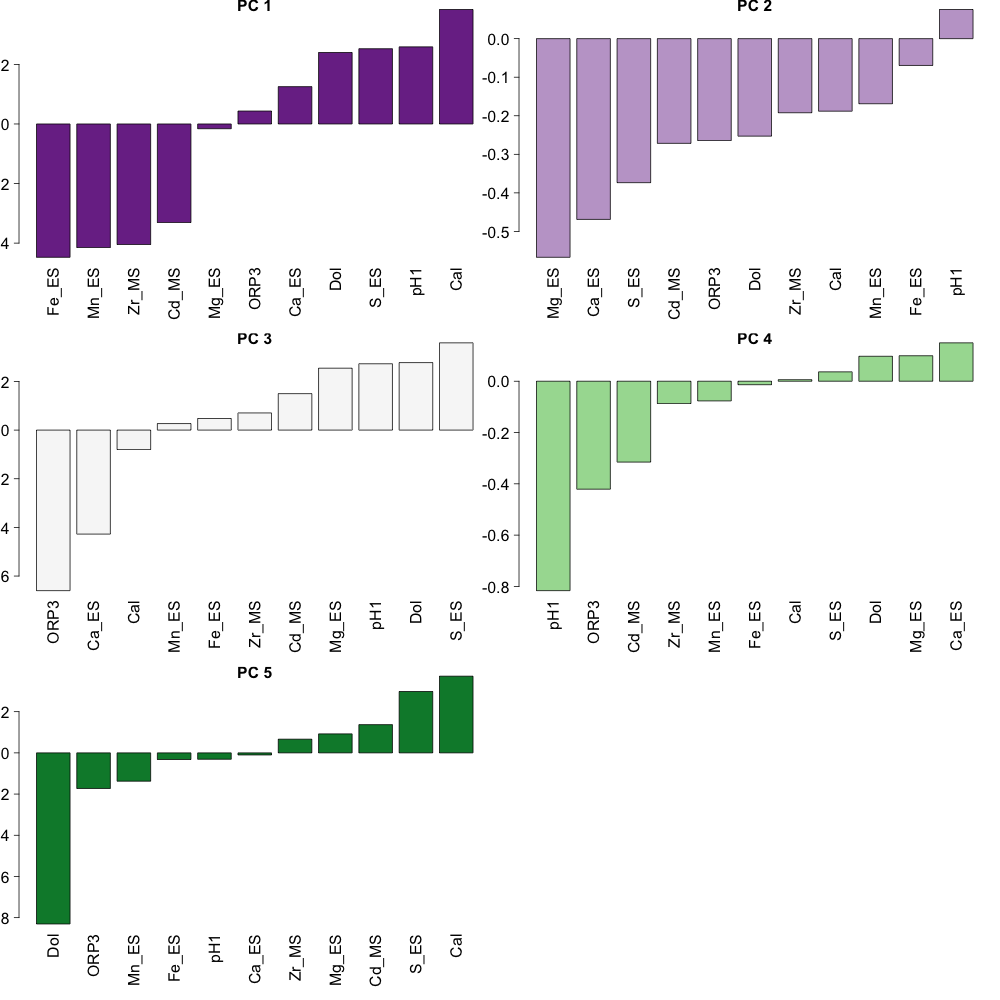

In [195]:
%%R -w 1000 -h 1000

#place side by side
par(mfrow=c(3,2),mar=c(8,2,1,1))

color=brewer.pal(n=5, name="PRGn")
for (n in 1:5)
{    
#composantes de PC1(changer index pour PCN)
barplot(sort(pca$rotation[,n]),main=paste("PC",n),col=color[n],cex.main=2,cex.axis=2,cex=2, las=2)
}


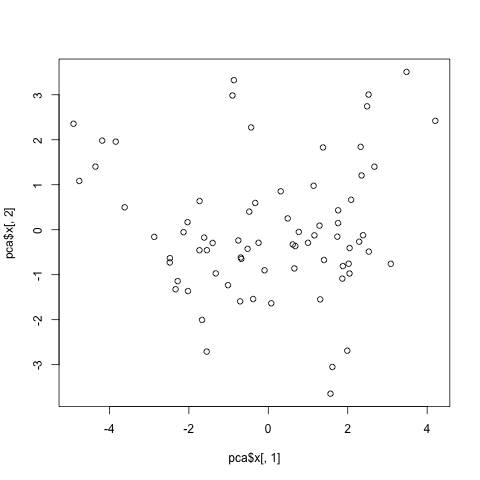

In [196]:
%%R
# Plot PC1 vs PC2
plot(pca$x[,1], pca$x[,2])

In [252]:
%%R

#Identify unoxidized subset
unox=subset(subset,V1=="BE-59"|V1=="BE-70"|V1=="BE-71"|V1=="BE=72"|V1=="BE-73"|V1=="BE-74"|V1=="BE-75"|V1=="BE-76"|V1=="BE-77"|V1=="BE-78"|V1=="BE-79"|V1=="BE-80"|V1=="BE-54"|V1=="BE-53")
print(unox)

      V1 Dist Location   Cal   Dol ORP3  pH1 Fe_ES Mg_ES Mn_ES S_ES Ca_ES Cd_MS
2  BE-59 -400      OUT 27.02 18.69  -59 8.54 11444 31548   241  456 82568  0.06
9  BE-70 -205 NEAREDGE 25.15 16.38  -42 8.12 14433 27474   273  731 82502  0.09
10 BE-71 -200     EDGE 21.24 16.72   69 8.35  7317 17320   110  228 67220  0.02
12 BE-73 -190     EDGE 23.20 17.84   49 8.45  7281 18544   116  108 71857  0.02
13 BE-74 -185 NEAREDGE 28.42 17.15   29 8.74 11388 28971   241  709 78371  0.07
14 BE-75 -180       IN 24.61 18.07  -59 8.61 14467 25742   306  738 78577  0.05
15 BE-76 -175       IN 21.59 21.06  -28 8.73 19377 28524   369  674 78433  0.10
16 BE-77 -170       IN 19.28 17.12  -42 8.53 20342 29344   418  557 78394  0.11
17 BE-78 -150       IN 16.27 13.07  -15 8.45 20910 23313   473  529 78268  0.12
18 BE-79 -100       IN 25.53 19.60  -32 8.58 12428 27543   257  902 78538  0.02
19 BE-80  -50       IN 27.31 16.45  -25 8.60 12047 32600   273  885 78436  0.02
23 BE-54  175       IN 26.69 16.14  -24 

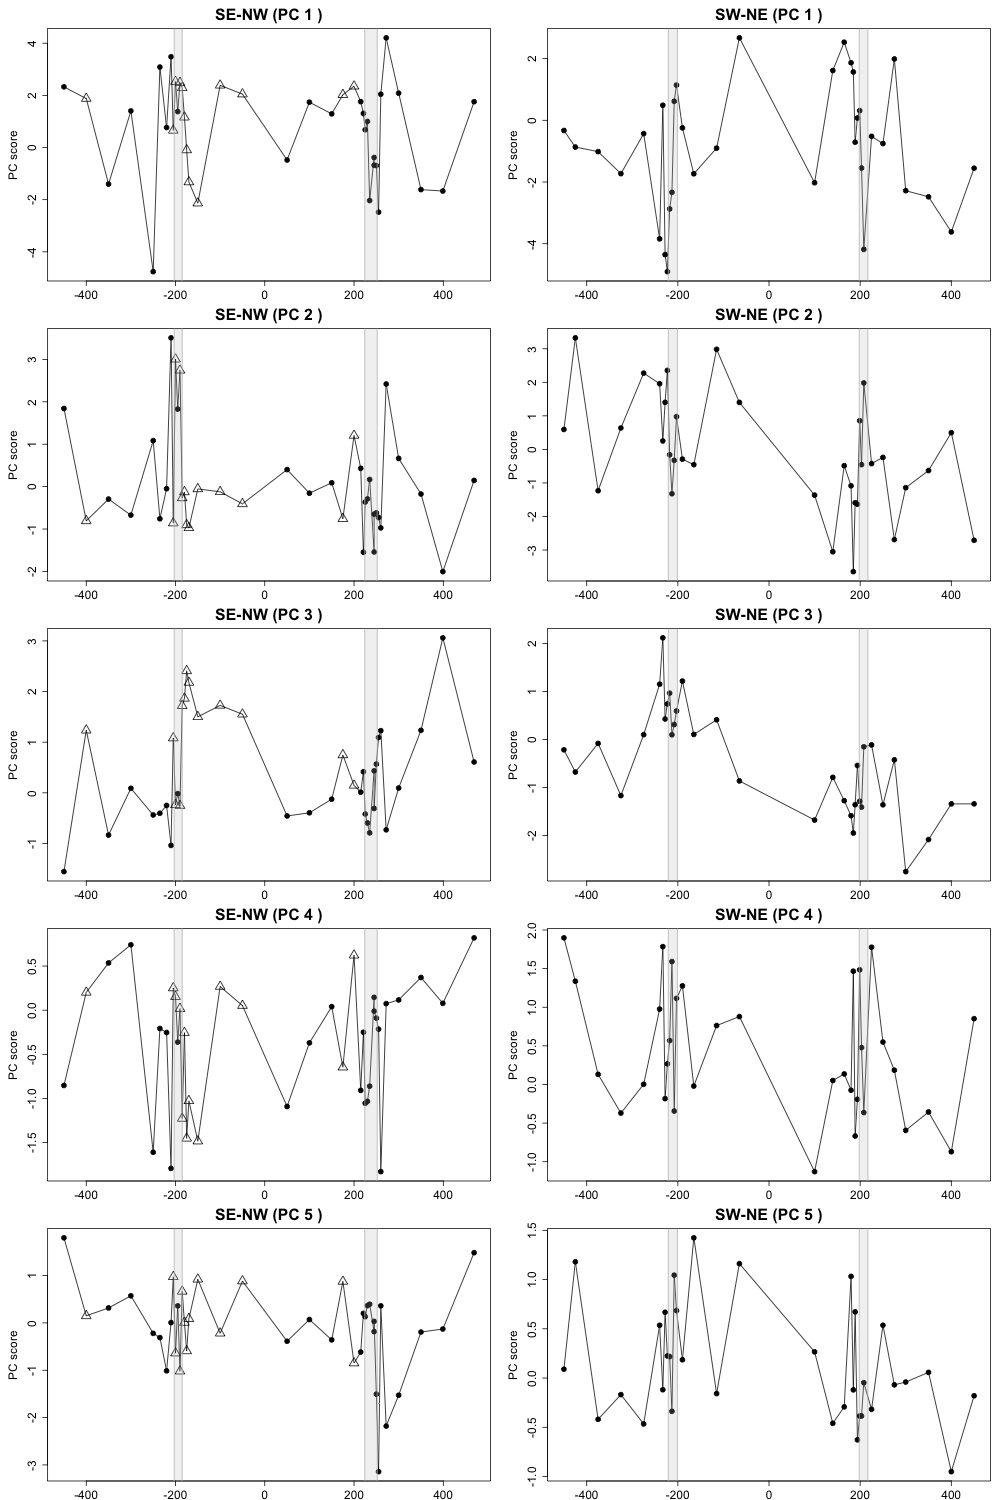

In [259]:
%%R -w 1000 -h 1500

#pdf("BE_ScoreTrans_14elmt_InvNorm.pdf", width=15, height=20)

### FUNCTION FOR TRANSPARENT COLORS
makeTransparent = function(coul, alpha=0.2) {
  alpha = floor(255*alpha)  
  col = col2rgb(coul, alpha=FALSE)

    return(rgb(red=col[1], green=col[2], blue=col[3], alpha=alpha, maxColorValue=255))
  }

#Plot PCs over distance
par(mfrow=c(5,2), mar=c(2,5,3,1))
for (pcindex in 1:5){
    
first=pca$x[d$Line=="SE-NW",]
second=pca$x[d$Line=="SW-NE",]

a=cbind(subset$Dist[d$Line=="SE-NW"], first[,pcindex])
plot(a[order(a[,1]),1], a[order(a[,1]),2], pch=ifelse(subset$V1 %in% unox$V1,24,20),ylab=paste("PC score"),xlab="",cex=2,cex.axis=1.5,cex.lab=1.5)

senw_xleft=c(-203,224)
senw_xright=c(-185,252)
lines(a[order(a[,1]),1], a[order(a[,1]),2])
rect(senw_xleft, -6, senw_xright, 6, border="grey", col=makeTransparent("grey"))
title(paste("SE-NW (PC",pcindex,")"), cex.main=2)
    
a=cbind(subset$Dist[d$Line=="SW-NE"], second[,pcindex])
plot(a[order(a[,1]),1], a[order(a[,1]),2], type="l", ylab=paste("PC score"),xlab="",cex.axis=1.5,cex.lab=1.5)

swne_xleft=c(-221, 198)
swne_xright=c(-201, 217)
points(a[order(a[,1]),1], a[order(a[,1]),2], pch=20,cex=2)
rect(swne_xleft, -7, swne_xright, 7, border="grey", col=makeTransparent("grey"))
title(paste("SW-NE (PC",pcindex,")"),cex.main=2)
}

#dev.off()